<a href="https://colab.research.google.com/github/legobitna/DeepLearning-basic/blob/main/8_2a_CNN_Visualization_Avoid_Overfitting_Techniques_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using more sophisticated images with Convolutional Neural Networks

You saw how to use a CNN to make your recognition of the human, horses, cat, dog, rock, paper, scissor more efficient. In this notebook you'll take that to the next level, recognizing real images of Cats and Dogs in order to classify an incoming image as one or the other. Real-world images aren't like MNIST (having all the images be the same size and shape, and they were all monochrome color) -- they're in different shapes, aspect ratios etc, and they're usually in color!

So, as part of the task you need to process your data -- not least resizing it to be uniform in shape. 

You'll follow these steps:

1.   Explore the Example Data of Cats and Dogs
2.   Build and Train a Neural Network to recognize the difference between the two
3.   Evaluate the Training and Validation accuracy
4. Many techniques to advoid overfitting ( Image Augmentation, Dropout, Batch Normalization)

In [ ]:
hello world I 'Want to say I can say

## Explore the Example Data

Let's start by downloading our example data, a .zip of 2,000 JPG pictures of cats and dogs, and extracting it locally in `/tmp`.

**NOTE:** The 2,000 images used in this exercise are excerpted from the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training time for educational purposes.

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-11-09 07:27:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.80, 172.217.7.144, 172.217.164.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   171MB/s    in 0.4s    

2020-11-09 07:27:03 (171 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [3]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

The contents of the .zip are extracted to the base directory `/tmp/cats_and_dogs_filtered`, which contains `train` and `validation` subdirectories for the training and validation datasets( for training, validation, and test sets), which in turn each contain `cats` and `dogs` subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a cat looks like', 'this is what a dog looks like' etc. The validation data set is images of cats and dogs that the neural network will not see as part of the training, so you can test how well or how badly it does in evaluating if an image contains a cat or a dog.

One thing to pay attention to in this sample: We do not explicitly label the images as cats or dogs. If you remember with the handwriting example earlier, we had labelled 'this is a 1', 'this is a 7' etc.  Later you'll see something called an ImageGenerator being used -- and this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. So, for example, you will have a 'training' directory containing a 'cats' directory and a 'dogs' one. ImageGenerator will label the images appropriately for you, reducing a coding step. 

Let's define each of these directories:

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)
print(validation_dogs_dir)

/tmp/cats_and_dogs_filtered/train/cats
/tmp/cats_and_dogs_filtered/train/dogs
/tmp/cats_and_dogs_filtered/validation/cats
/tmp/cats_and_dogs_filtered/validation/dogs


Now, let's see what the filenames look like inside the `cats` and `dogs` `train` directories (file naming conventions are the same in the `validation` directory):

In [6]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.773.jpg', 'cat.766.jpg', 'cat.774.jpg', 'cat.931.jpg', 'cat.833.jpg', 'cat.939.jpg', 'cat.351.jpg', 'cat.992.jpg', 'cat.128.jpg', 'cat.400.jpg']
['dog.179.jpg', 'dog.305.jpg', 'dog.526.jpg', 'dog.214.jpg', 'dog.516.jpg', 'dog.538.jpg', 'dog.778.jpg', 'dog.265.jpg', 'dog.28.jpg', 'dog.541.jpg']


Let's find out the total number of cat and dog images in the `train` and `validation` directories:

In [7]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


For both cats and dogs, we have 1,000 training images and 500 validation images.

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

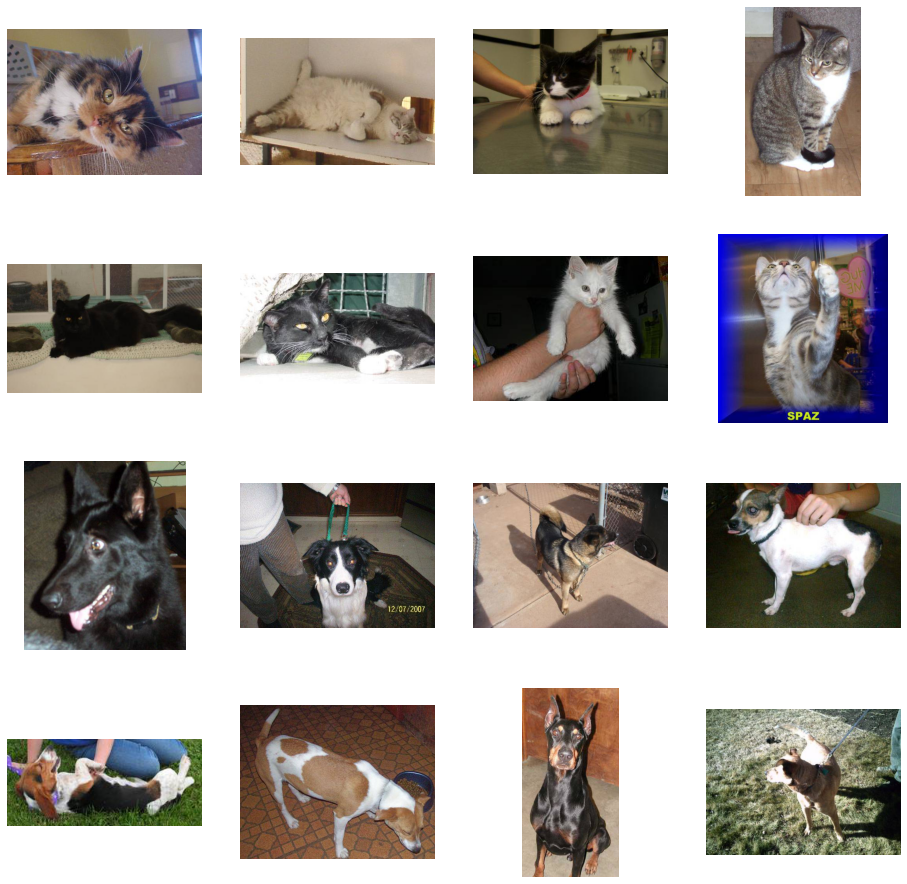

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


It may not be obvious from looking at the images in this grid, but an important note here, these images come in all shapes and sizes. These are color and in a variety of shapes. Before training a Neural network with them you'll need to tweak the images. You'll see that in the next section.

Ok, now that you have an idea for what your data looks like, the next step is to define the model that will be trained to recognize cats or dogs from these image.

## Building a Small Model from Scratch to Get to ~72% Accuracy

In the previous section you saw that the images were in a variety of shapes and sizes. In order to train a neural network to handle them you'll need them to be in a uniform size. We've chosen 150x150 for this, and you'll see the code that preprocesses the images to that shape shortly. 

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [10]:
import tensorflow as tf

Next we will define a **Sequential layer** as before, adding some convolutional layers first. Note the input shape parameter this time. For MNIST or Fashion MNIST, it was 28x28x1, because the image was 28x28 in greyscale (8 bits, 1 byte for one color channel). This time for cat and dog dataset, it is 150x150 for the size and 3 channels(24 bits, 3 bytes) for the color depth. 


We then add a couple of convolutional layers Conv2D and MaxPooling2D, and Flatten the final result to feed into the DENSE connected layers.

Finally we add the densely connected layers. 

Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

You can build any CNN model structure you want but I suggest you can start with something like this:
- CNN - 16 filters, kernel size 3x3, activation relu, with input shape = 150x150x3
- Max Pooling with kernel size 2x2 with default stride 2x2
- CNN - 32 filters, kernel size 3x3, activation relu
- Max Pooling with kernel size 2x2 with default stride 2x2
- CNN - 64 filters, kernel size 3x3, activation relu
- Max Pooling with kernel size 2x2 with default stride 2x2
- Flatten the output of the cube output of the previous CNN layer
- Dense with 512 neurons with activation relu
- Dense with 1 neurons with activation sigmoid

In [13]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # YOUR CODE HERE
     tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,3)),
     tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
     tf.keras.layers.MaxPool2D(2,2),
     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
     tf.keras.layers.MaxPool2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')

    # Flatten the results to feed into a DNN
   
    # 512 neuron hidden layer
    
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    
])

The model.summary() method call prints a summary of the NN 

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad) which are better), also automatically adapt the learning rate during training, and would work equally well here.)

But in the future, if you are doubt or don't worry about optimizers, use **Adam** or **Nadam** which are ones of the best.

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 32 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit`, `evaluate_generator`, and `predict_generator`.

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR='/tmp/cats_and_dogs_filtered/train'
VALID_DIR='/tmp/cats_and_dogs_filtered/validation'
IMG_WIDTH,IMG_HEIGHT=150,150

# All images will be rescaled by 1./255.\ WITH NO IMAGE AUGMENTATION
# YOUR CODE HERE
train_datagen = ImageDataGenerator(rescale= 1./255)

validation_datagen  = ImageDataGenerator(rescale= 1./255)


# --------------------
# Flow training images in batches of 32 using train_datagen generator with binary mode and size 150x150
# --------------------
# YOUR CODE HERE
train_generator =      train_datagen.flow_from_directory(
                        TRAINING_DIR,
                        target_size=(IMG_WIDTH, IMG_HEIGHT), 
                        batch_size=32,
                        seed=102,# 이거뭔지 찾아보기 
                        class_mode='binary')
# --------------------
# Flow validation images in batches of 32 using test_datagen generator with binary mode and size 150x150
# --------------------
# YOUR CODE HERE
validation_generator =  validation_datagen.flow_from_directory(
                        VALID_DIR,
                        target_size=(IMG_WIDTH, IMG_HEIGHT),
                        batch_size=32,
                        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Training
Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 test images. (This may take a few minutes to run.)

Do note the values per epoch.

You'll see 4 values per epoch -- Loss, Accuracy, Validation Loss and Validation Accuracy. 

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses. The Validation accuracy is the measurement with the data that has not been used in training. As expected this would be a bit lower.


In [19]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=15,
                              verbose=2)

Epoch 1/15
63/63 - 8s - loss: 0.8361 - accuracy: 0.5540 - val_loss: 0.6728 - val_accuracy: 0.6610
Epoch 2/15
63/63 - 8s - loss: 0.6575 - accuracy: 0.6370 - val_loss: 0.6987 - val_accuracy: 0.5800
Epoch 3/15
63/63 - 8s - loss: 0.5847 - accuracy: 0.6920 - val_loss: 0.6839 - val_accuracy: 0.6530
Epoch 4/15
63/63 - 8s - loss: 0.5359 - accuracy: 0.7505 - val_loss: 0.6070 - val_accuracy: 0.6810
Epoch 5/15
63/63 - 8s - loss: 0.4488 - accuracy: 0.8030 - val_loss: 0.5614 - val_accuracy: 0.7340
Epoch 6/15
63/63 - 8s - loss: 0.3649 - accuracy: 0.8375 - val_loss: 0.6866 - val_accuracy: 0.6690
Epoch 7/15
63/63 - 8s - loss: 0.3206 - accuracy: 0.8570 - val_loss: 0.5943 - val_accuracy: 0.7220
Epoch 8/15
63/63 - 8s - loss: 0.2540 - accuracy: 0.9000 - val_loss: 0.6550 - val_accuracy: 0.7350
Epoch 9/15
63/63 - 8s - loss: 0.2156 - accuracy: 0.9200 - val_loss: 0.6688 - val_accuracy: 0.7300
Epoch 10/15
63/63 - 8s - loss: 0.1372 - accuracy: 0.9520 - val_loss: 1.4466 - val_accuracy: 0.6520
Epoch 11/15
63/63 -

###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a dog or a cat.

In [20]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  
  classes = model.predict(x, batch_size=10)
  
  print("Predicted Class:",classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving cat.jpg to cat.jpg
Predicted Class: [1.]
cat.jpg is a dog


### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


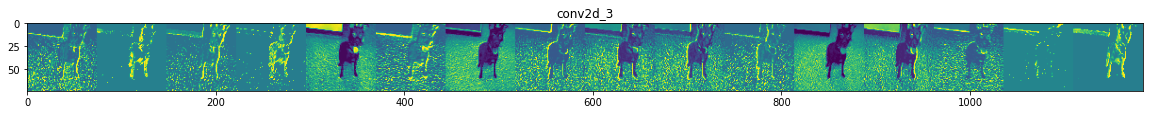

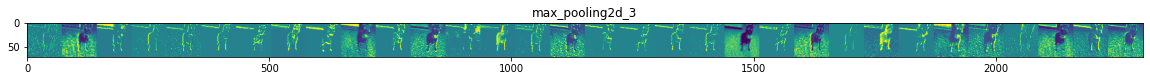

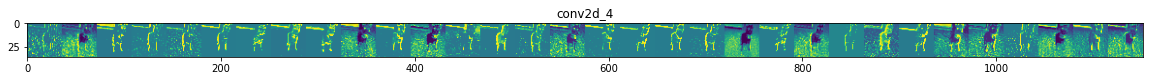

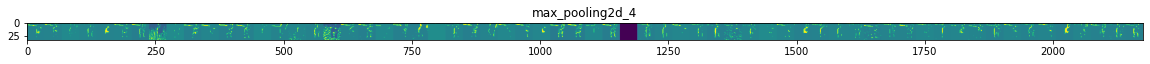

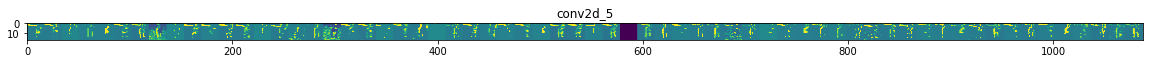

In [21]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation filter pipeline.

### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

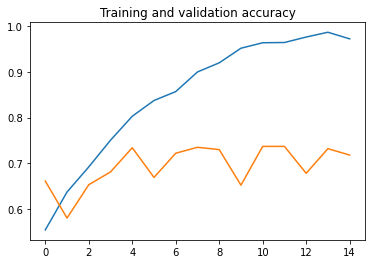

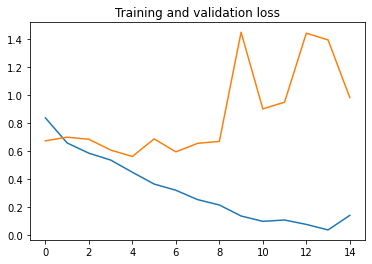

In [22]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

As you can see, we are **overfitting** like it's getting out of fashion. Our training accuracy (in blue) gets close to 100% (!) while our validation accuracy (in green) stalls as 70%. Our validation loss reaches its minimum after only five epochs.

Since we have a relatively small number of training examples (2000), overfitting should be our number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions. For instance, if you, as a human, only see three images of people who are lumberjacks, and three images of people who are sailors, and among them the only person wearing a cap is a lumberjack, you might start thinking that wearing a cap is a sign of being a lumberjack as opposed to a sailor. You would then make a pretty lousy lumberjack/sailor classifier.

Overfitting is the central problem in machine learning: given that we are fitting the parameters of our model to a given dataset, how can we make sure that the representations learned by the model will be applicable to data never seen before? How do we avoid learning things that are specific to the training data?

We need to find a way to regularize our model. Let's learn about image augmentation and dropout!

## Avoid Overfitting 

Let's try a different model this time!

It's similar to the previous models that you have used, but I have updated the layers definition. Note that there are now 4 convolutional layers with 32, 64, 128 and 128 convolutions respectively.

Also, this will train for 100 epochs, because I want to plot the graph of loss and accuracy.

In [23]:
def model_maker():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])
  return model

In [24]:
def generator_maker():
  # All images will be rescaled by 1./255
  train_datagen = ImageDataGenerator(rescale=1./255)
  test_datagen = ImageDataGenerator(rescale=1./255)

  # Flow training images in batches of 32 using train_datagen generator
  train_generator = train_datagen.flow_from_directory(
          train_dir,  # This is the source directory for training images
          target_size=(150, 150),  # All images will be resized to 150x150
          batch_size=32,
          # Since we use binary_crossentropy loss, we need binary labels
          class_mode='binary')

  # Flow validation images in batches of 32 using test_datagen generator
  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode='binary')
  return train_generator, validation_generator

In [25]:
model = model_maker()
train_generator, validation_generator = generator_maker()
history = model.fit(
      train_generator,
      epochs=60,
      validation_data=validation_generator,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/60
63/63 - 8s - loss: 0.6920 - accuracy: 0.5445 - val_loss: 0.6866 - val_accuracy: 0.5370
Epoch 2/60
63/63 - 8s - loss: 0.6701 - accuracy: 0.5970 - val_loss: 0.6446 - val_accuracy: 0.6330
Epoch 3/60
63/63 - 8s - loss: 0.6360 - accuracy: 0.6460 - val_loss: 0.6760 - val_accuracy: 0.5630
Epoch 4/60
63/63 - 8s - loss: 0.6007 - accuracy: 0.6800 - val_loss: 0.6730 - val_accuracy: 0.5720
Epoch 5/60
63/63 - 8s - loss: 0.5642 - accuracy: 0.7090 - val_loss: 0.5731 - val_accuracy: 0.7030
Epoch 6/60
63/63 - 8s - loss: 0.5360 - accuracy: 0.7275 - val_loss: 0.5685 - val_accuracy: 0.7000
Epoch 7/60
63/63 - 8s - loss: 0.5287 - accuracy: 0.7360 - val_loss: 0.5507 - val_accuracy: 0.7050
Epoch 8/60
63/63 - 8s - loss: 0.5013 - accuracy: 0.7525 - val_loss: 0.5594 - val_accuracy: 0.7170
Epoch 9/60
63/63 - 8s - loss: 0.4853 - accuracy: 0.7650 - val_loss: 0.5626 - val_accuracy: 0.7160
Epoch 10/60
63/63 - 8s - loss: 0.4

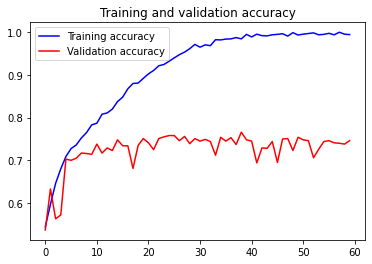

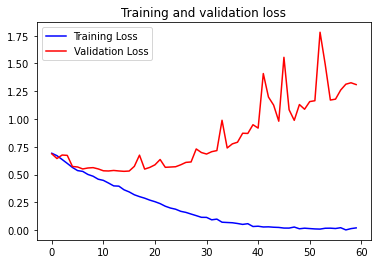

In [28]:
def acc_loss_graph(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
  plt.legend()
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'r', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()
  
acc_loss_graph(history)

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 


### Image Augmentation


What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy...

Now take a look at the ImageGenerator. There are properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```
These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


Here's some code where we've added Image Augmentation. Run it to see the impact.


In [29]:
def generator_augmentation_maker():
  # This code has changed. Now instead of the ImageGenerator just rescaling
  # the image, we also rotate and do other operations
  # Updated to do image augmentation
  # YOUR CODE HERE
  TRAINING_DIR='/tmp/cats_and_dogs_filtered/train'
  VALID_DIR='/tmp/cats_and_dogs_filtered/validation'

  train_datagen = ImageDataGenerator(rescale= 1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                    )
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  # Flow training images in batches of 32 using train_datagen generator
  train_generator = train_datagen.flow_from_directory(
          TRAINING_DIR,  # This is the source directory for training images
          target_size=(150, 150),  # All images will be resized to 150x150
          batch_size=32,
          # Since we use binary_crossentropy loss, we need binary labels
          class_mode='binary')

  # Flow validation images in batches of 32 using test_datagen generator
  validation_generator = test_datagen.flow_from_directory(
          VALID_DIR,
          target_size=(150, 150),
          batch_size=32,
          class_mode='binary')
  return train_generator, validation_generator

In [30]:
model = model_maker()
train_generator, validation_generator = generator_augmentation_maker()
history = model.fit(
      train_generator,
      epochs=60,
      validation_data=validation_generator,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/60
63/63 - 16s - loss: 0.6946 - accuracy: 0.4925 - val_loss: 0.6837 - val_accuracy: 0.5010
Epoch 2/60
63/63 - 16s - loss: 0.6824 - accuracy: 0.5575 - val_loss: 0.6642 - val_accuracy: 0.5890
Epoch 3/60
63/63 - 16s - loss: 0.6683 - accuracy: 0.5840 - val_loss: 0.6417 - val_accuracy: 0.6290
Epoch 4/60
63/63 - 16s - loss: 0.6596 - accuracy: 0.6080 - val_loss: 0.6277 - val_accuracy: 0.6600
Epoch 5/60
63/63 - 16s - loss: 0.6308 - accuracy: 0.6490 - val_loss: 0.5998 - val_accuracy: 0.6730
Epoch 6/60
63/63 - 16s - loss: 0.6207 - accuracy: 0.6505 - val_loss: 0.5852 - val_accuracy: 0.6830
Epoch 7/60
63/63 - 16s - loss: 0.5986 - accuracy: 0.6735 - val_loss: 0.5926 - val_accuracy: 0.6850
Epoch 8/60
63/63 - 16s - loss: 0.5958 - accuracy: 0.6720 - val_loss: 0.5713 - val_accuracy: 0.6860
Epoch 9/60
63/63 - 16s - loss: 0.5890 - accuracy: 0.6980 - val_loss: 0.5635 - val_accuracy: 0.6970
Epoch 10/60
63/63 - 16s -

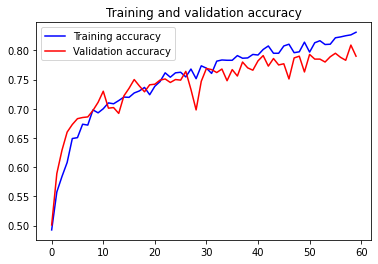

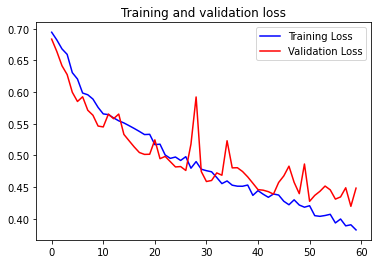

In [32]:
acc_loss_graph(history)

Amazing! You can see that the image augmentation works so well to avoid overfitting since our model never the same image twice so it got no idea what is coming next to memorize the training set!

### Dropout


<img src="https://i.imgur.com/G7UQ5Zu.jpg" alt="drawing" width="400"/>

Dropout is one of the most popular regularization techniques for deep neural networks.

It was proposed in a paper23 by Geoffrey Hinton in 2012 and further detailed
in a 2014 paper24 by Nitish Srivastava et al., and it has proven to be highly successful:

even the state-of-the-art neural networks get a 1–2% accuracy boost simply by adding dropout. This may not sound like a lot, but when a model already has 95% accuracy, getting a 2% accuracy boost means dropping the error rate by almost 40% (going from 5% error to roughly 3%).

It is a fairly simple algorithm: at every training step, every neuron (including the input neurons, but always excluding the output neurons) has a probability p of being temporarily “dropped out,” meaning it will be entirely ignored during this training step, but it may be active during the next step (see Figure 11-9). The hyperparameter p is called the dropout rate, and it is typically set between 10% and 50%: closer to 20– 30% in recurrent neural nets (see Chapter 15), and closer to 40–50% in convolutional neural networks (see Chapter 14). After training, neurons don’t get dropped anymore. And that’s all (except for a technical detail we will discuss momentarily).

It’s surprising at first that this destructive technique works at all. Would a company perform better if its employees were told to toss a coin every morning to decide whether or not to go to work? Well, who knows; perhaps it would! The company would be forced to adapt its organization; it could not rely on any single person to work the coffee machine or perform any other critical tasks, so this expertise would have to be spread across several people. Employees would have to learn to cooperate with many of their coworkers, not just a handful of them. The company would become much more resilient. If one person quit, it wouldn’t make much of a difference.
It’s unclear whether this idea would actually work for companies, but it certainly does for neural networks. Neurons trained with dropout cannot co-adapt with their neighboring neurons; they have to be as useful as possible on their own. They also cannot rely excessively on just a few input neurons; they must pay attention to each of their input neurons. They end up being less sensitive to slight changes in the inputs.

In the end, you get a more robust network that generalizes better. Another way to understand the power of dropout is to realize that a unique neural network is generated at each training step. Since each neuron can be either present or
absent, there are a total of 2N possible networks (where N is the total number of droppable neurons). This is such a huge number that it is virtually impossible for the same neural network to be sampled twice. Once you have run 10,000 training steps, you have essentially trained 10,000 different neural networks (each with just one training instance). These neural networks are obviously not independent because they share many of their weights, but they are nevertheless all different. The resulting neural network can be seen as an averaging ensemble of all these smaller neural networks.

**Note**: Since dropout is only active during training, comparing the training
loss and the validation loss can be misleading. In particular, a
model may be overfitting the training set and yet have similar
training and validation losses. So make sure to evaluate the training
loss without dropout (e.g., after training).

It could be impletmented like this:
```python
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dropout(rate=0.2),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dropout(rate=0.2),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dropout(rate=0.2),
keras.layers.Dense(10, activation="softmax")
])
```

In [39]:
def model_maker_with_dropout():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      # YOUR CODE HERE (1 layer of dropout is enough with 50%)

      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])
  return model

In [40]:
model = model_maker_with_dropout()
train_generator, validation_generator = generator_augmentation_maker()
history = model.fit(
      train_generator,
      epochs=60,
      validation_data=validation_generator,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/60
63/63 - 8s - loss: 0.6916 - accuracy: 0.5310 - val_loss: 0.6968 - val_accuracy: 0.5000
Epoch 2/60
63/63 - 8s - loss: 0.6734 - accuracy: 0.5825 - val_loss: 0.6641 - val_accuracy: 0.6070
Epoch 3/60
63/63 - 8s - loss: 0.6546 - accuracy: 0.6115 - val_loss: 0.6354 - val_accuracy: 0.6340
Epoch 4/60
63/63 - 8s - loss: 0.6267 - accuracy: 0.6510 - val_loss: 0.6063 - val_accuracy: 0.6770
Epoch 5/60
63/63 - 8s - loss: 0.5915 - accuracy: 0.6835 - val_loss: 0.5801 - val_accuracy: 0.7040
Epoch 6/60
63/63 - 8s - loss: 0.5683 - accuracy: 0.6985 - val_loss: 0.5738 - val_accuracy: 0.6990
Epoch 7/60
63/63 - 8s - loss: 0.5531 - accuracy: 0.7045 - val_loss: 0.5666 - val_accuracy: 0.7000
Epoch 8/60
63/63 - 8s - loss: 0.5267 - accuracy: 0.7425 - val_loss: 0.5984 - val_accuracy: 0.6840
Epoch 9/60
63/63 - 8s - loss: 0.5156 - accuracy: 0.7430 - val_loss: 0.5556 - val_accuracy: 0.7110
Epoch 10/60
63/63 - 8s - loss: 0.5

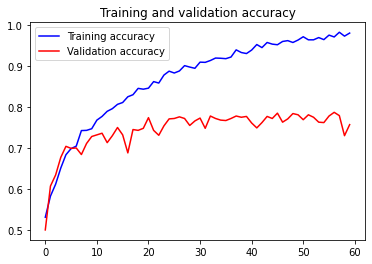

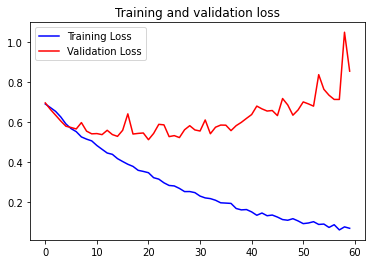

In [41]:
acc_loss_graph(history)

Hopefully, you can see that the graph less fluctuate and have less spike. Also the validation accuracy is still slowly increasing and the validation loss increase less dratically. Dropout works in a more subtly way compared to image augmentation.  

### Image Augmentation and Dropout

Let's combine both!

In [42]:
model = model_maker_with_dropout()
train_generator, validation_generator = generator_augmentation_maker()
history = model.fit(
      train_generator,
      epochs=60,
      validation_data=validation_generator,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/60
63/63 - 16s - loss: 0.6935 - accuracy: 0.5065 - val_loss: 0.6870 - val_accuracy: 0.5390
Epoch 2/60
63/63 - 16s - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6601 - val_accuracy: 0.5920
Epoch 3/60
63/63 - 16s - loss: 0.6723 - accuracy: 0.5780 - val_loss: 0.6677 - val_accuracy: 0.5550
Epoch 4/60
63/63 - 16s - loss: 0.6647 - accuracy: 0.5930 - val_loss: 0.6395 - val_accuracy: 0.6290
Epoch 5/60
63/63 - 16s - loss: 0.6502 - accuracy: 0.6185 - val_loss: 0.6163 - val_accuracy: 0.6630
Epoch 6/60
63/63 - 16s - loss: 0.6438 - accuracy: 0.6280 - val_loss: 0.6134 - val_accuracy: 0.6610
Epoch 7/60
63/63 - 16s - loss: 0.6204 - accuracy: 0.6575 - val_loss: 0.5758 - val_accuracy: 0.6940
Epoch 8/60
63/63 - 16s - loss: 0.6131 - accuracy: 0.6555 - val_loss: 0.5756 - val_accuracy: 0.6830
Epoch 9/60
63/63 - 16s - loss: 0.5850 - accuracy: 0.7010 - val_loss: 0.5935 - val_accuracy: 0.6610
Epoch 10/60
63/63 - 16s -

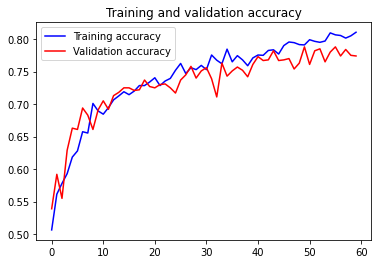

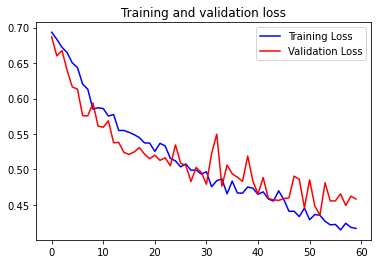

In [43]:
acc_loss_graph(history)

You can see that by combining both image augmentation and dropout, the line of validation is following very closely to train set which is good news. However, there are a lot of spiking since our dense neurons need to works harder to detect features with image augmentation so dropout 50% gets in their way. Maybe it is worth to try again this time with lower dropout percentage.

### Batch Normalization

<img src="https://charlesmartin14.files.wordpress.com/2017/06/batchnorm2-e1497643748774.png?w=409" alt="drawing" width="400"/>

<img src="https://d3i71xaburhd42.cloudfront.net/521ebc310afd88a2672f0af5f77dd4e6ec5c994f/4-Figure2-1.png" alt="drawing" width="800"/>

<img src="https://i0.wp.com/miro.medium.com/max/1200/1*1NZt_7GXryBmDukvnRTE_A.png?ssl=1" alt="drawing" width="800"/>



Although using ReLU can significantly reduce the danger of the vanishing/exploding gradients problems at the beginning of training, it doesn’t guarantee that they won’t come back during training.

The technique consists of adding an operation in the model just before or after the activation function of each hidden layer. This operation simply zero-centers and normalizes each input, then scales and shifts the result using two new parameter vectors per layer: one for scaling, the other for shifting. In other words, the operation lets the model learn the optimal scale and mean of each of the layer’s inputs.

In order to zero-center and normalize the inputs, the algorithm needs to estimate each input’s mean and standard deviation. It does so by evaluating the mean and standard deviation of the input over the current mini-batch (hence the name “Batch Normalization”).

Batch Normalization considerably improved all
the deep neural networks they experimented with, leading to a huge improvement in the ImageNet classification task (ImageNet is a large database of images classified into many classes, commonly used to evaluate computer vision systems. The vanishing gradients problem was strongly reduced, to the point that they could use saturating activation functions such as the tanh and even the logistic activation function. The networks were also much less sensitive to the weight initialization. The authors were able to use much larger learning rates, significantly speeding up the learning process.

Many of the tricks we used in deep nets to alleviate the unstable gradients problem can also be used for RNNs: good parameter initialization, faster optimizers, dropout, and so on. However, nonsaturating activation functions (e.g., ReLU) may not help as much here; in fact, they may actually lead the RNN to be even more unstable during training. Why? Well, suppose Gradient Descent updates the weights in a way that increases the outputs slightly at the first time step. Because the same weights are used at every time step, the outputs at the second time step may also be slightly increased, and those at the third, and so on until the outputs explode—and a nonsaturating activation function does not prevent that. You can reduce this risk by using a smaller learning rate, but you can also simply use a saturating activation function like the
hyperbolic tangent (this explains why it is the default). In much the same way, the gradients themselves can explode. If you notice that training is unstable, you may want to monitor the size of the gradients (e.g., using TensorBoard) so with batch normalization, this issue can be partly solved.

The implementation in Keras can be this easy!
```python
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.BatchNormalization(),
keras.layers.Dense(300, activation="relu"),
keras.layers.BatchNormalization(),
keras.layers.Dense(100, activation="relu"),
keras.layers.BatchNormalization(),
keras.layers.Dense(10, activation="softmax")
])
```

In [31]:
# your turn to play around with batch normalization :)
def model_maker_everything():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150, 3)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])
  return model

model = model_maker_everything()
model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)       

In [44]:
# maybe combine all technique above to reduce the overfitting of your model and profit!
# You can see that Batch Normalization is pretty much used after every single block of CNN while dropout is only used in between of Dense layers at the end.
model = model_maker_everything()
train_generator, validation_generator = generator_maker()
history = model.fit(
      train_generator,
      epochs=60,
      validation_data=validation_generator,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/60
63/63 - 8s - loss: 1.0156 - accuracy: 0.5635 - val_loss: 0.7905 - val_accuracy: 0.5000
Epoch 2/60
63/63 - 8s - loss: 0.6664 - accuracy: 0.6465 - val_loss: 0.7685 - val_accuracy: 0.5000
Epoch 3/60
63/63 - 8s - loss: 0.5719 - accuracy: 0.7100 - val_loss: 0.8571 - val_accuracy: 0.5000
Epoch 4/60
63/63 - 8s - loss: 0.5410 - accuracy: 0.7280 - val_loss: 0.6941 - val_accuracy: 0.5300
Epoch 5/60
63/63 - 8s - loss: 0.4867 - accuracy: 0.7560 - val_loss: 0.8557 - val_accuracy: 0.5130
Epoch 6/60
63/63 - 8s - loss: 0.4374 - accuracy: 0.8050 - val_loss: 0.6484 - val_accuracy: 0.6280
Epoch 7/60
63/63 - 8s - loss: 0.4204 - accuracy: 0.8040 - val_loss: 0.5578 - val_accuracy: 0.7160
Epoch 8/60
63/63 - 8s - loss: 0.3857 - accuracy: 0.8275 - val_loss: 0.5507 - val_accuracy: 0.7200
Epoch 9/60
63/63 - 8s - loss: 0.3461 - accuracy: 0.8505 - val_loss: 0.5893 - val_accuracy: 0.7130
Epoch 10/60
63/63 - 8s - loss: 0.3